<a href="https://colab.research.google.com/github/Pragna235/A2Z-Sheet/blob/main/End_to_End_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1. End-to-End Machine Learning Project

In this chapter, we will work on an end-to-end machine learning project, pretending to be a recently hired data scientist at a real estate company.

Here are the main steps we will go through:

1. Framing the problem & looking at the big picture

We Define the objective in business terms and answer the following questions:

- How would the solution be used?
- What are the current solutions/workarounds?
- How should we frame this problem? (`Supervised/Unsupervised`, `Batch/Online`, `Instance-based/Model-based`)
- How should performance be measured?
- Is the performance measure aligned with the business objective?
- What would be the minimum performance needed to reach the business objective?
- What are comparable problems? can we use previous methods or tools?
- Is human expertise available?
- How would we solve the problem manually?
- List the assumptions we/others have made so far?
- Verify assumptions if possible

2. Get the data

The second step is about data acquisition, we go through the following steps:
    
- We list the data we need and how much.
- We find & Document where can we get that data.
- We check how much space it will take.
- We check the legal obligations & get authorization if necessary.
- We get access authorization.
- We create a workspace with enough storage space.
- We get the data.
- We convert the data into a format we can easily manipulate.
- We ensure sensitive information is either deleted or protected.
- We check the size & type of data.
- We sample a test set, put it aside, and never look at it

3. Explore the Data

After acquiring the necessary data, we explore its properties by doing the following:
    
- We create a copy of the data for exploration and sample it down if necessary
- We create a Jupyter notebook to save our data exploration sessions.
- We study each attribute (column) and its characteristics:
    - Name
    - Type (Categorical, Continuous, Int/Float, Structured/Unstructured, Text ..)
    - % of missing values
    - Noisiness and type of noise (Stochastic, rounding error, ..)
    - Usefulness for the task
    - Type of distribution (Gaussian, Logarithmic, Uniform ..)
- For supervised Learning tasks, we identify the target attribute
- We visualize the data
- We study the correlations between attributes
- We study how we would solve the problem manually
- We identify the promising transformations we may want to apply
- We Identify Extra data that would be useful
- We Document what we have learned in report

4. Data Preparation

Now's the time to prepare the data for machine learning. We go through the following list:

- We create a copy of the data.
- We write functions for all the data transformations we want to apply: we do this once for reproducibility on test and production data. Packaging functions like this will also allow us to treat preprocessing steps as hyper-parameters.
- We clean the data by fixing or removing outliers, and filling missing values with `0`, mean, median, inference, .. or drop their rows/columns.
- We conduct feature selection: we drop the attributes that provide no useful information for the task
- We conduct feature engineering. Examples of feature engineering:
    - Discretize continuous features
    - Decompose features (Categorical, datetime, ...)
    - Add promissing feature transformations ($log(x)$, $sqrt(x)$, $x^{2}$, ..)
    - Aggregate features into promising new features
- We scale the features of interest by standarizing and/or normalize them.
    
5. Shortlist promising models

After preparing the data, we select and shortlist potential models that may solve the problem:  

- If the data set is big, we sample smaller datasets for experimentation.
- We try many models from different categories (`NB`, `Linear regression`, `RF`, `NN`, ..) using standard parameters.
- We measure and compare their performances: for each model, we measure `N`-fold cross validation and capture the mean and standard diviation of the performance.
- We analyze the most significant variable for each algorithm.
- We analyze the types of errors the models make. What data would we use to avoid these errors?
- We perform a quick round of feature selection and engineering.
- We perform one or two more quick iterations of the previous steps.
- We shortlist the top-`3`-to-`5` most performant algorithms that make different types of errors.


6. Fine-tune your models & combine them into a great solution

After shortlisting the most promising algorithms, it's time to fine-tune their performance, ensemble them and export a final model.

- We should use the whole dataset
- We fine-tune hyper-parameters using cross-validation

We treat our data transformation choices as hyper-parameters. Unless there are very few hyper-parameters to explore, we should prefer random search to grid search. If training takes a long time, we try out Bayesian Optimization.

- We try ensemble methods. Combining the best models will often produce better results than running them individually.
- Once we are confident about the model, we measure its performance on the test set to estimate its generalization error.

7. Present the solution

After exporting a final model, it's time to present the work in an accessible fashion:
- We document what we have done
- We create a nice presentation
- We explain why our solution achieves the business objective
- We showcase interesting things we noticed along the way
- We ensure the key findings are easily communicated through beautiful visualization and one-line statements

8. Launch, Monitor, and maintain your system

After presenting our findings, it's time to launch, monitor, and maintain the system:
- We get our solution ready for production
- We write monitoring code to check our system's performance while running in production and run interval-based checks to alert when it drops.

During this step, we should be aware of the "slow degradation" phenomena: models tend to rot as data evolves. We should also monitor ourr inputs quality. Finally, we re-train the model on a regular basis on fresh data

## Working with Real Data

When we are learning about ML, it's best to work with real data sets, not artificial ones. We list the following data sources:

- Popular open data reposatories
    - [UC Irvine ML repo](https://archive.ics.uci.edu/ml/index.php)
    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [Amazon AWS Datasets](https://registry.opendata.aws/)
- Meta Portals: they list open data reposatories
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex)
    - [Quandl](https://www.quandl.com/)
- Other pages listing many open data reposatories
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [The Datasets Subreddit](https://www.reddit.com/r/datasets)

In this chapter, we'll use the California housing prices dataset, taken from the StatLib repository. The dataset is based on data from the 1990 California cencus.

For teaching purposes, we've added a categorical feature and removed multiple ones.

## 1. Look at the big picture

Our first task is to use the california census data to build a model of the housing prices in the state. This data includes features such as:
- Population
- Median Income
- Median housing price for each block group in California

A block group is the smallest geographical unit for which cencus data is published. A Block group has a population between 600 to 3,000. We will call them "districts" for short.
    
Our model should be able to predict the median housing price for any district, given the other features.

### Frame the problem

The first question we should ask is: "What is the business objective?". Building a model is probably not the end goal for us. This leads us to the more important question: "How does the comapny expects to benefit from the model?".

Our boss answers that the model's output (A prediction for a district's median housing price) will be fed along other signals to another model to decide whether or not to invest in the district. Getting this information right is critical, as it's directly connects to revenue. In our case, our prediction will serve as input to another model that attempts to increase the company's return on investment (ROI).

Since we are talking about our data flowing from model to model, it might be of benefit for us to define a "data pipeline". A sequence of data processing components is called a **data pipeline** Pipelines are very common is machine learning systems, since data needs to be preprocessed, manipulated, transformed to output the final predictions. The pipeline's components typically run asynchonosly. Each component pulls in a large amount of data, process it and spits out a result (prediction) into a data store. Each component is fairly self-contained.

Within a company, different teams can focus on different components.

The next question to ask your boss is "what the current solution looks like?"

The problem is a supervised learning problem, and because we're predicting the median housing price for a district (which is numerical), then this is a **Regression Task**. We can also categorize this problem as a batch learning problem since cencus data is historical and does come every year.
    
If the data is huge, we can either split the data between multiple servers using Map Reduce or use online learning.

### Select a Performance Measure

A typical performance measure for regression problems is **Root Mean Squared Error**. It has a higher weight for large errors. Its general formula:

$$ RMSE(X,h) = \sqrt{ {1 \over m} \sum_{i=1}^m ( h(x^{(i)}) - y^{(i)} )^2  }$$

Wehre $m$ is the number of instances in the dataset you are measuring the $RMSE$ on, $x^{(i)}$ is a vector containing all of the input feature values (excluding the label) for the $i^{th}$ instance. $y^{(i)}$ is the label or the desired output of input $x^{(i)}$, and $X$ is a matrix containing all feature values excluding the labels/targets.

The $i^{th}$ row of $X$ corresponds to $x^{(i)}$ and we can note:

$$X=\left(
\begin{array}{c}
  {x^{(1)}}^{T}\\
  {x^{(2)}}^{T}\\
  {x^{(3)}}^{T}\\
  \vdots\\
  {x^{(m)}}^{T}\\
\end{array}
\right)$$

$h(.)$ is the system's prediction function, also called hypothesis. $RMSE(X,h)$ is the cost function measured on the set of examples $X$ and the hypothesis $h$. $RMSE$ is the preferred performance measure for regression tasks, but sometimes, we prefer to use other cost functions such as:

- $MAE$: We use mean absolute error in the case where we have many outliers (also called the average absolute diviation):

$$MAE(X,h) = {1 \over m} \sum_{i=1}^m |h(x^{(i)}) - y^{(i)}|$$

Both $RMSE$ and $MAE$ are ways to measure the distance between two vectors. In our case, the distance between the vector of predictions and the vector of targets/labels.

However, various distance measures, or norms, are possible. Computing the root of the sum of squares ($RMSE$) corresponds to the euclidian norm (also called $l_{2}$ norm). Computing the sum of absolutes ($MAE$) corresponds to the $l_{1}$ norm. More generally, the norm $l_{k}$ of a vector $\bf{x}$ is:

$$||v||_{k} = (\sum_{i=1}^{m} |v_{i}|^{k})^{1 \over k}$$

With $l_{0}$ giving the number of non-zero elements in the vector $v$, and $l_{\infty}$ giving the maximum absolute value in the vector $v$. The higher the norm index, the more it focuses on large values and neglects small ones. This is why $RMSE$ is more sensitive to large errors than $MAE$.

When outliers are exponentially rare (like in a bell curve) $RMSE$ performs extremely well and is preferred over other cost functions.

### Check the assumptions

Lastly, it is good practice to list and verify the list of assumptions made by us or others, this can help us catch serious mistakes early one.

To give an example, let's image we've spent 6 months working on an algorithm to predict the median housing price per district only to find out later that our predictions are being converted into categories ("Cheap", "Medium", "Expensive"). In this case, It would've been better to work on the classification problem instead of a regression one, that would produce better predictions for the downstream system.

Fortunately, we find out that the team needs the actual median housing prices. Good to go!

## 2. Get the Data

### Download the Data

It is preferable to create some util functions to automate the process of downloading/extracting web-based data sets.

In [ ]:
import os
import tarfile
import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`

    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Now we download the data:

In [ ]:
fetch_housing_data()

Let's write a small function to load the data using pandas:

In [ ]:
import pandas as pd

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Loads Housing data into a pandas dataframe.

    # Arguments:
        housing_path: the path where `housing.csv` exists

    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

### Take a Quick Look at the Data Structure

In [ ]:
housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district and has the following (10) attributes:
- `longitude`
- `latitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `median_house_value`
- `ocean_proximity`

The `info()` method is useful to take a quick look at the data. It answers the following questions:
- How many rows exist?
- How many `NaN`s per column?
- What are the data types (per column)?

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There exist $20,640$ instances (rows) in the dataset. Which means that it is fairly small data sample by machine learning standards.

$207$ districts are missing the `total_bedrooms` attribute, we will need to take care of this later.

On the other hand, all attributes are numerical, except `ocean_proximity`

Since we noticed repeated `ocean_proximity` values for the top 5 rows, we suspect that it is a categorical column, let's check it out:

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`.describe()` shows a summary of all numerical values:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We should be careful, because `.describe()` ignores null values.

The `std` row shows standard deviation, which measures how dispersed the values are. The `25%`, `50%`, `75%` rows show the persentiles of each columns (Example: `25%` of districts have $<=18$ years housing median age).

Another way to get a feel of numerical continuous data is to draw a histogram for each numerical column:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

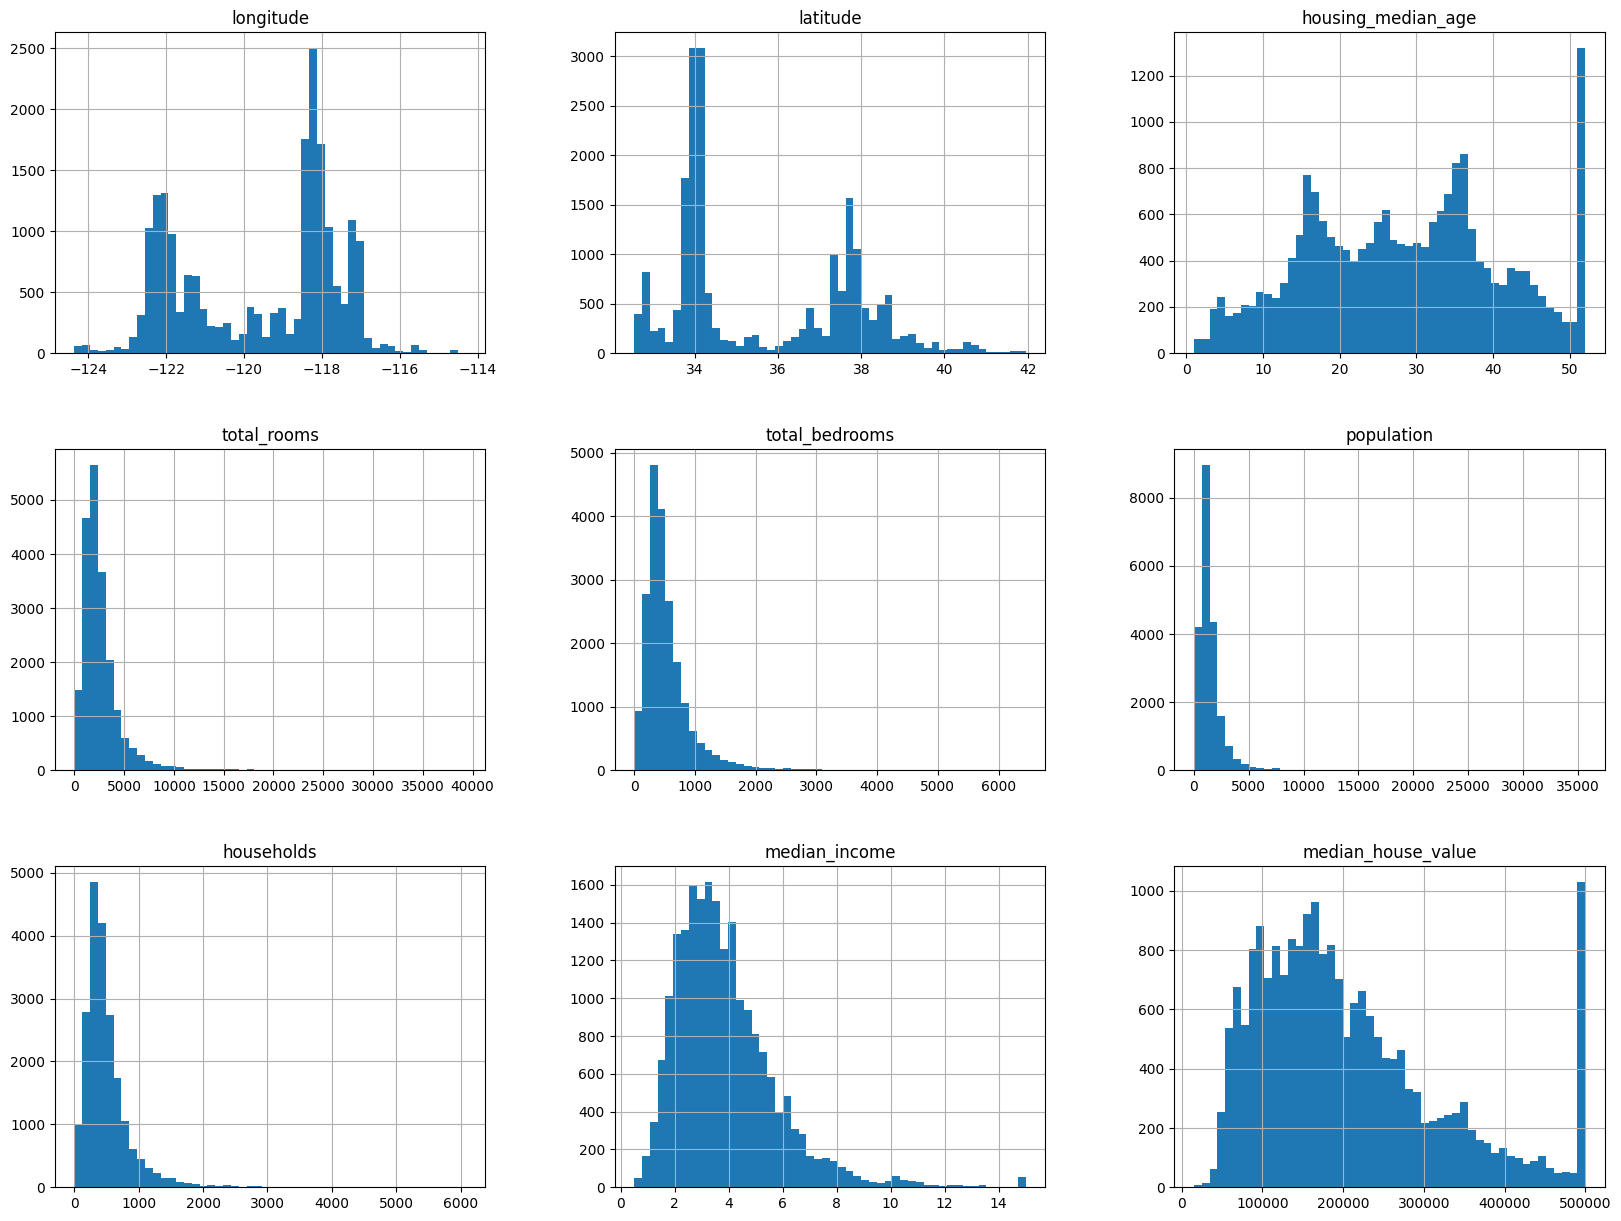

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

There are a few things we might notice in these histograms.

The `median_income` attribute isn't expressed in US dollars. After checking with the team, they informed us that the numbers roughly represent tens of thousands of dollars.

The `housing_median_age` and the `median_house_value` were capped. This might pose a problem especially for the second attribute since it represent the output we want to predict. Our machine learning algorithms may learn that prices never go beyond that limit. In reality, we need to check with our client's team if this can be a problem or not. If they tell us that they need precise predictions even beyond 500,000 USD, then we have 2 options:

- Manually collect the actual labels of districts with a `median_house_value` >= 500,000USD.
- Remove those districts from the training/test sets, we don't want the model to learn never to go beyond 500,000USD.

The attributes have very different scales, we will discuss feature scaling later. The attributes are **tail-heavy** & they often extend to the right than to the left. As a result, It will be difficult for many machine learning algorithms to find patterns within the data.

We will learn how to transform the distribution from a tailed one to a bell-shaped normal/gaussian one.

### Create a Test Set

Creating a test set is easy, We randomly (or not if we're dealing with timeseries) select a subset of the data, typically 20% (or less if the dataset is large).

In [ ]:
import numpy as np

If we use the row index as an identifier, we will need to preserve the order at all costs by making sure new data gets appended to the end of the dataframe and no rows are deleted/altered.

If the previous is not feasible, we can try to build an identifier from the multiple features of each row. For example: a (Latitude/longitude) couple is guaranteed to be stable a few million years, so we can build a unique index based on it. The following procedure creates a unique identifier for each row:

1. Convert latitude/longitude values from $\Bbb{R}$ to $\Bbb{Z}$ (by $\times 100$)
2. Convert latitude/longitude from $\Bbb{Z}$ to $\Bbb{N}$ using:

$$
f(n) =
\begin{cases}
2n,  & \text{if $n \ge 0$} \\
-2n-1, & \text{if $n \lt 0$}
\end{cases}
$$

3. Use `Cantor Pairing` function to create unique indexes from $\Bbb{N}^2$ tuples using:
$$\pi(k_{1},k_{2})={(k_{1}+k_{2})\cdot{(k_{1}+k_{2}+1)}\over{2}}+k_{2}$$

Let's implement it:

In [ ]:
def from_Z_to_N(z):
    """Converts a number from \Bbb{Z} to \Bbb{N}

    # Arguments
        z, integer: in \Bbb{Z}

    # Returns
        n, natural number: in \Bbb{N}
    """
    if z >= 0:
        n = 2 * z
    else:
        n = -2 * z - 1
    return n

In [ ]:
def cantor_pairing(n1, n2):
    """Creates a unique number `n` in \Bbb{N} from a tuple (n1,n2) in \Bbb{N}^2

    # Arguments
        n1, natural number: first element of the tuple.
        n2, natural number: second element of the tuple.

    # Returns
        n, natural number: unique index from tuple (n1,n2).
    """
    n = ( ( (n1 + n2) * (n1 + n2 + 1) ) / 2 ) + n2
    return n

In [ ]:
def lat_lon_to_index(lat, lon):
    """Converts a tuple of (lat,lon) to a unique index in \Bbb{N}

    # Arguments
        lat, float: latitude.
        lon, float: longitude.

    # Returns
        index, positive int: unique index.

    # Notes
        - 3 steps to do it:
            1. Convert (lat,lon) to \Bbb{Z} by *100.
            2. Convert (lat,lon) from \Bbb{Z} to \Bbb{N} using `from_Z_to_N()`
            3. Create the unique index using `cantor_pairing(_,_)`
    """
    lat, lon = int(lat*100), int(lon*100)
    lat, lon = from_Z_to_N(lat), from_Z_to_N(lon)
    index = cantor_pairing(lat, lon)
    return np.int64(index)

In [ ]:
housing['id'] = housing.apply(lambda row: lat_lon_to_index(row['latitude'], row['longitude']), axis=1)

In [ ]:
housing['id'].value_counts()

513289261    24
513481522    20
513417431    18
513353344    18
463609694    14
             ..
513032709     1
513417159     1
519523778     1
519459311     1
515855387     1
Name: id, Length: 11573, dtype: int64

We still get duplicate indexes, and at the same time, we have duplicate (lat,lon) tuples as follows:

In [ ]:
housing.groupby(by=['longitude', 'latitude']).count()['total_rooms'].sort_values()

longitude  latitude
-124.35    40.54        1
-118.90    34.41        1
           35.26        1
           35.41        1
-118.89    34.22        1
                       ..
-122.41    37.75       10
-122.42    37.75       10
-122.44    37.78       11
-122.42    37.80       11
-122.41    37.80       15
Name: total_rooms, Length: 12590, dtype: int64

It's time to revert back to the book:

In [ ]:
del(housing['id'])

In [ ]:
housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [ ]:
# train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column='id')
# train_set.shape, test_set.shape

`scikit-learn` provides multiple functions to split datasets in various ways. The simplest function is `train_test_split()`

Let's reproduce our implementation using sklearn's `train_test_split()`:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

So far, we have only considered purely random sampling methods. This is generally fine if our dataset is large enough. If it's not, however, we're running the chance of introducing a significant sampling bias.

When a survey company plans to interview 1,000 people, they don't pick them at random from a phone book. They make sure the `1,000` selected people are representative of the whole target population. this is called **stratified sampling**.

The population is divided into homogenuous subgroups called strata. Each stratum represents an instances percentage of the overall population. We want a test set to maintain the percentages of each stratum to make sure it's representative of the whole population. A purely random sampling method will introduce biases that are in favour of dominant groups/strata.

Suppose we've chatted with experts who told us that the `median income` attribute is a very important feature to predict `median_house_value`. We may want to ensure that the test set is representative of the overall `median income` distribution, that may be divided into categories.

Most median income values are clustered around $\$15,000$ to $\$60,000$ but some median incomes go far beyond $6K$

It is important to have, for each stratum, a sufficient number of instances in your dataset. Or else, there might be a bias while assessing the stratum importance.

Let's use `pd.cut` to create the strata:

In [ ]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<Axes: >

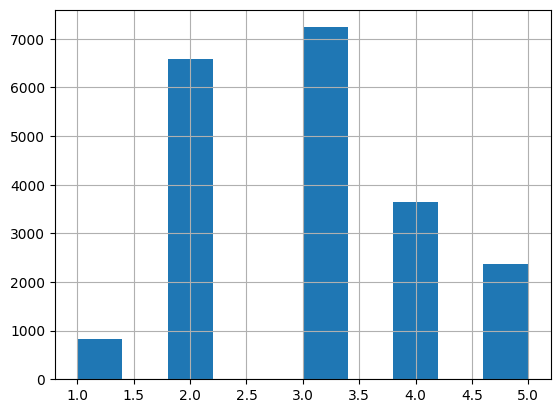

In [ ]:
# visualize the categories
housing['income_cat'].hist()

Now we are ready to do stratified sampling based on income category:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's check if this worked as expected, we can start by checking the proportions of income categories in the test set:

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now that we have a test set that is representative of `income_cat`'s distribution, it's time to remove it:

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

We spent a considerable amount of time on test set generation because this is an important part of any machine learning project. Moreover, many of these ideas will be useful later when we talk about cross-validation.

## 3.Discover & Visualize the Data to Gain Insights

First, let's make sure we have put the test set aside, and you are only exploring the training set:

In [ ]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [ ]:
strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')

<ipython-input-61-044385fea95e>:1: FutureWarning: the 'fname'' keyword is deprecated, use 'path' instead.
  strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')


Let's create a copy of the training set for us to play with it without harming the original one:

In [ ]:
housing = strat_train_set.copy(); housing.shape

(16512, 11)

### Visualizing Geographical Data

Since there is latitude/longitude information, it's a good idea to use pandas' matplotlib plot method to visualize the districts of interest using `.plot()`

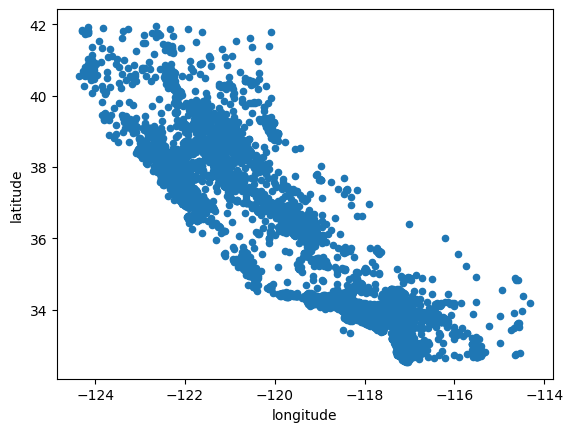

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

This looks like california, but other than that, we can't really see any other pattern. Setting the alpha to 0.1 makes it much easier to estimate densities:

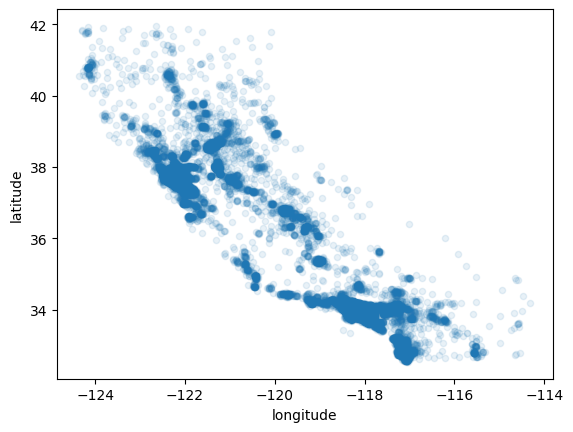

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

Our brains are wired up to spot patterns in pictures, the tricky thing is that we have to play around with matplotlib's visualization parameters to make the patterns stand out.

In the following figure, the radius of each circle represents the district's population (option `s`). The color represents the price (option `c`). We will also use a pre-defined color map called **jet** (option `cmap`) which ranges from `blue` (low levels) to `red` (high level).

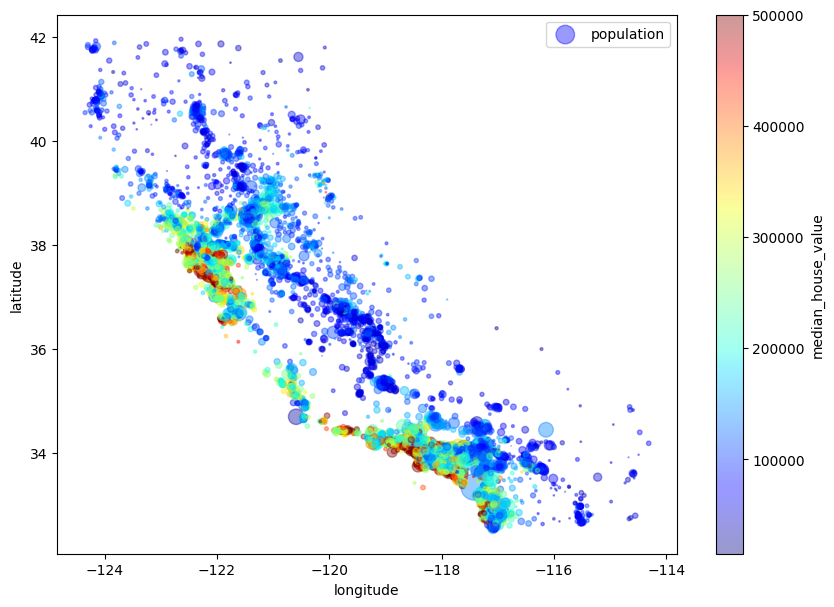

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100.,
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

This image tells us that the median housing price is related to location (closer to the sea -> more expensive). The relation between `population` and `price` isn't that obvious, let's check it out:

In [ ]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.000000,-0.026882
median_house_value,-0.026882,1.000000


A very weak pair-wise correlation between price and population. We leave it at that & we continue with the book.

### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient of every pair of columns:

In [ ]:
corr_matrix = housing.corr()

<ipython-input-67-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


Now let's look at how much each attribute correlates with `house_median_value`:

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
id                   -0.052761
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient is $\in [-1,1]$. When the coefficient is close to `1` it means there exist a strong positive correlation between the two variables (For example. the median house value tends to go up with the median average income goes up). When the coefficient is close to `-1` it means there exist a strong negative correlation between the two variables. When the coefficient is close to `0` it means that there is a weak correlation between the two variables.

The following figure shows multiple bi-variate plots and their corresponding correlation coefficient:

<div style="text-align:center;"><img style="width:50%" src="static/imgs/corr_examples.png" /></div>

The correlation coefficients only measure linear correlations (if `X` goes up, `Y` goes up/down) and it has nothing to do with the slope.

Another way to look at correlations is to use the Pandas `.scatter_matrix()` method to visualize correlations between any 2 attributes. Since we have `11` attributes and we cannot fit all plots, let's focus on the few promising ones.

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

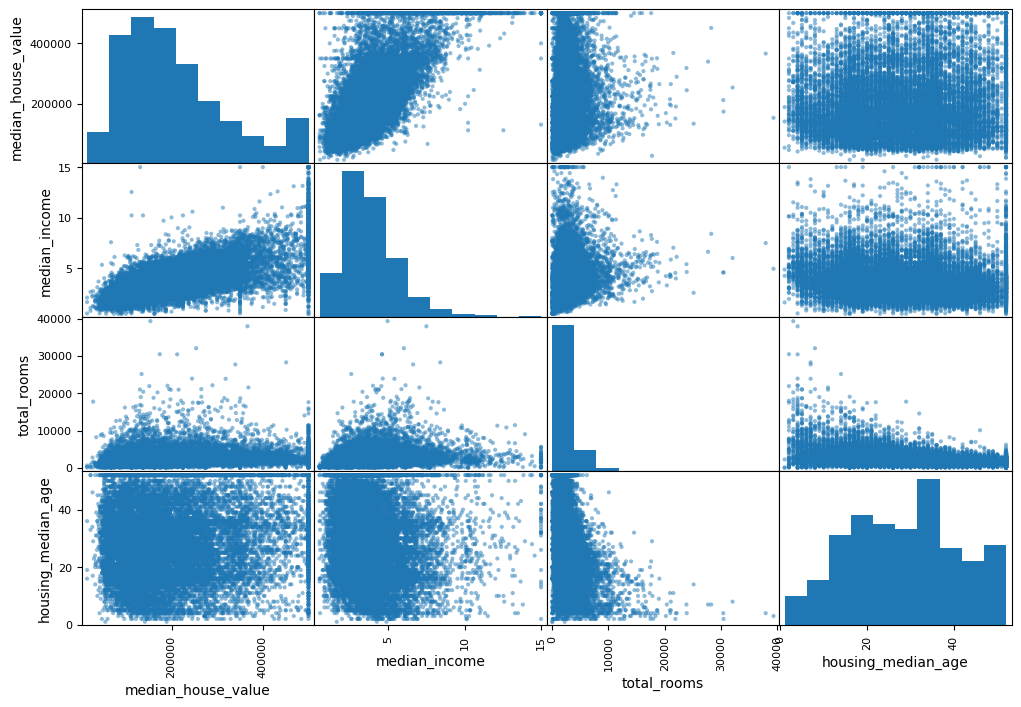

In [ ]:
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

The most interesting attribute to predict `median_house_value` is `median_income`

Let's zoom in the correlation scatterplot:

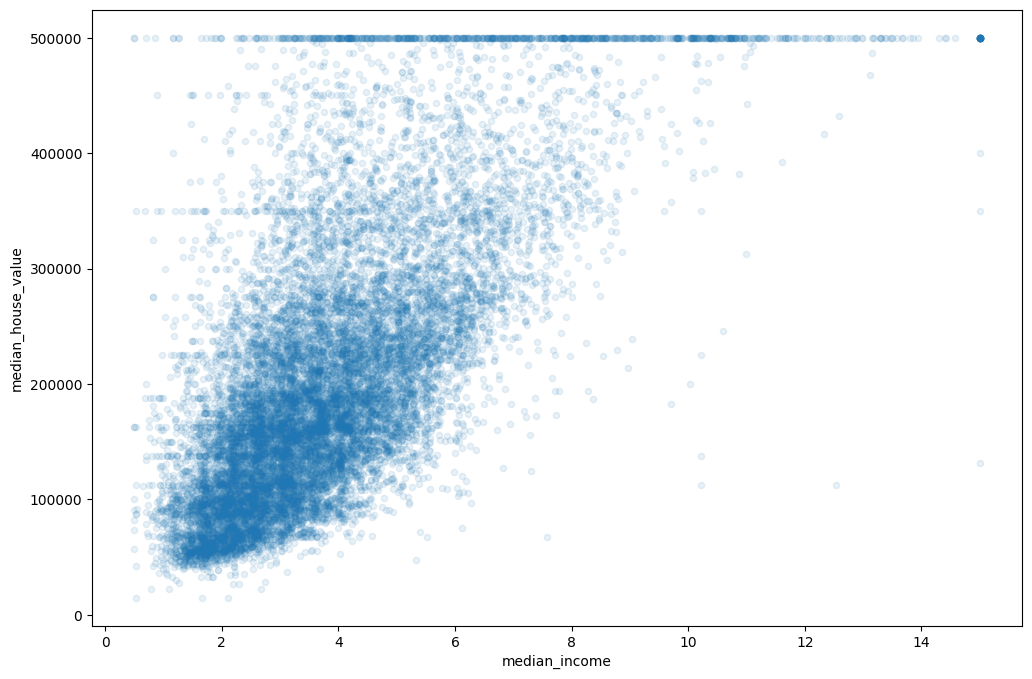

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

This correlation is indeed very strong, we can clearly see the upward trend

The price cap that we noticed earlier is clearly visible at $500,000$USD, but the plot reveals other less obvious lines at:
    - USD450K
    - USD350K
    - USD280K
    - ...

We may want to remove the corresponding districts so that the model to not learn these quirks.

### Experimenting with Attribute Combinations

We may want to transform tail heavy distributions using the logarithm function ($log(.)$).

One last thing we would want to do before feeding the data into an ML algorithm is to try to combine features. Examples:
- The number of rooms per household, not the total number of rooms in a district.
- The total number of bedrooms isn't helpful either, we want to compare it with the number of rooms.
- The number of poeple per household is also an interesting feature to look at.

Let's create them all:

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

Let's look at the correlation matrix again:

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-74-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
id                         -0.052761
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

We notice that `bedrooms_per_room` is much more correlated with `median_house_value`. meaning that the more expensive the house, the less the `bedrooms per room` ratio. `rooms_per_household` have a moderate positive correlation with `median_house_value`, the more expensive a house is, the more rooms it will have.

We don't have to go through every correlation/engineered feature, the goal is to start at the right place.

Data science is an **iterative** process, once we have a model up and running, we can analyze its outputs and go back to this step to explore the data again.

## 4. Prepare the Data for Machine Learning Algorithms

Instead of doing this manually, we should write functions for this purpose. We mention the following reasons:

- It will allow us to reproduce the transformations on any fresh dataset.
- We will gradually build a library of transformations that we can use in future projects.
- We can use these functions in our live systems to transform the data using a pipeline before feeding it into the algorithm.
- This will make it possible for us to try various transformations or a combination of them to check what works best.

Let's start with a fresh dataset again:

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.shape, housing_labels.shape

((16512, 10), (16512,))

In [ ]:
# housing
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

Most machine learning algorithms cannot deal with missing features, so let's create a few functions to deal with them.

We saw earlier that `total_bedrooms` have missing values, we have 3 options:
1. Get rid of the corresponding districts
    - `housing.dropna(subset='total_bedrooms')`
2. Get rid of the whole attribute (feature)
    - `housing.drop('total_bedrooms', axis=1)`
3. Set the missing values to some value (zero, mean, median, regressor preds,...)
    - `median = housing['total_bedrooms'].median()`
    - `housing['total_bedrooms'].fillna(median, inplace=True)`
    
We can also use `scikit-learn`'s `SimpleImputer`:

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')

Since the imputer can only work on numerical attributes, we need to create a copy of the dataFrame without the `OCEAN_PROXIMITY` text attribute:

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we can just fit the imputer to the dataframe:

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has calculated the median of all attributes and stored them in `.statistics_`.

In [ ]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        4.66965166e+08])

In [ ]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        4.66965166e+08])

Now we can use the "trained or fitted" imputer to transform the numerical attributes by replacing missing values with their corresponding medians:

In [ ]:
X = imputer.transform(housing_num)
X.shape

(16512, 9)

In [ ]:
X

array([[-1.21460000e+02,  3.85200000e+01,  2.90000000e+01, ...,
         7.06000000e+02,  2.17360000e+00,  5.11880301e+08],
       [-1.17230000e+02,  3.30900000e+01,  7.00000000e+00, ...,
         7.68000000e+02,  6.33730000e+00,  4.51930461e+08],
       [-1.19040000e+02,  3.53700000e+01,  4.40000000e+01, ...,
         3.00000000e+02,  2.87500000e+00,  4.76795567e+08],
       ...,
       [-1.22720000e+02,  3.84400000e+01,  4.80000000e+01, ...,
         1.72000000e+02,  3.17970000e+00,  5.19459339e+08],
       [-1.22700000e+02,  3.83100000e+01,  1.40000000e+01, ...,
         5.01000000e+02,  4.19640000e+00,  5.18492840e+08],
       [-1.22140000e+02,  3.99700000e+01,  2.70000000e+01, ...,
         1.97000000e+02,  3.13190000e+00,  5.25601258e+08]])

The result is a numpy array containing the transformed features. If we want to put it back into a Pandas DataFrame, it's simple:

In [ ]:
housing_tr = pd.DataFrame(data=X, index=housing_num.index, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,511880301.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,451930461.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,476795567.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,449288725.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,468066049.0


Scikit-learn's API is remarkably [well designed](https://arxiv.org/abs/1309.0238). These are its main design principles:
- Consistency: all objects share a consistent and simple interface
    - `Estimators`: Any object that can estimate some parameters based on a dataset is called an estimator.
    - `Transformers`: Some estimators can also transform a dataset (like imputer), these are called transformers.
    - `Predictors`: Finally, some estimators, when given a dataset, are able to export predictions, these are called predictors.
- Inspection: All the estimators parameters/hyperparameters are accessible directly through public variables.
- Non-proliferation of classes: Datasets are represented as Numpy arrays or Scipy sparse matrices, no home-made data types.
- Composition: existing building blocks are re-used as much as possible.
- Sensible defaults: Scikit-learn provide reasonable default values for most hyper-parameters, making it easy to create good baseline estimators.

### Handling Text & Categorical Attributes

So far, we have only dealt with numerical attributes, now, let's check text/categorical attributes.

We have only 1 categorical attribute, which is `ocean_proximity`. let's look at its values for the 10 first instances:

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


There is a limited number of values, each of which represents a category:

In [ ]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

Most ML algorithms prefer to work with numbers, so let's convert the text into **ordinal categorical** numbers:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape

(16512, 1)

In [ ]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

We can get the list of categories using the `categories_` attribute of the `OrdinalEncoder`:

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that the encoder will assume that two nearby categories are more similar than distant ones, but this is not the case for us (ex. categories 0 and 4 are clearly more similar than 0 and 1). To fix this issue, we create one binary attribute per category:
- One attribute is equal to `1` if the category is equal to `<1H OCEAN` and `0` otherwise.
- One attribute is equal to `1` if the category is equal to `INLAND` and `0` otherwise.
- ...

This is called 1-hot encoding because, for any row, only one binary attribute will be equal to 1 (hot), while the others are 0s (cold).

The new attributes are sometimes called dummy attributes, let's create them:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder()

In [ ]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a sparse scipy matrix instead of a numpy array. If we use numpy, we have to store all of the zeros in memory, comprising of most of the array. Instead, we store the information as a Scipy sparse matrix which only stores the locations of the non-zeros (which is more efficient).

We can mostly use it as a normal `2D` array, but if we want to convert it into a dense numpy array:

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical feature has a large number of possible values (ex. country, postcode, city, ...) then a 1-hot encoder will result in a large number of input features. This may slow down training and degrade performance.

We may want to replace the categorical inputs with numerical features that relate to the categorical values. Examples:
- Replace country with its GDP/Area/Population
- Replace `ocean_proximity` with `distance_to_ocean`.

Alternatively, we could replace the categorical features with low-dimensional learnable vectors called embeddings. Each category's representation would be learned during training. This is part of what's called "representation learning" or "deep learning".

### Custom Transformers

Although `scikit-learn` provide many useful transformers, we will need to write our own for custom tasks such as data cleanup or feature engineering. We'll want our transformer to easily work with other scikit-learn functionalities (such as Pipelines).

All we need to do is create a class with 3 methods: `fit`, `transform`, `fit_transform`. We can get `fit_transform` for free by adding `TransformerMixin` as a base class.

If we add `BaseEstimator` as another base class & avoid the use of *args* and *kwargs*, we get two extra methods (`.get_params()` & `.set_params()`).

For example, here is a small transformer that adds the combined attributes discussed earlier:

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

In [ ]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """Engineers new features from existing ones: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`

    # Arguments:
        add_bedrooms_per_room, bool: defaults to True. Indicates if we want to add the feature `bedrooms_per_room`.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # We don't have any internal parameters. Only interested in transforming data.

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [ ]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 511880301, 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 451930461, 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 476795567, 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., 519459339, 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., 518492840, 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 525601258, 5.477157360406092,
        3.1725888324873095]], dtype=object)

The `add_bedrooms_per_room` hyper-parameter will easily help us find out whether adding the attributes helps the ML algorithm or not.

We can add hyper-parameters to control any pre-processing step that we're not sure about. The more we automate these data preprocessing steps, the more combinations we get to try out.

We will more likely find a great combination of steps that maximizes performance (and will save us a ton of time).

### Feature Scaling

With few exceptions, ML algorithms don't perform well on data features that have different scales. However, scaling the target value is generally not required.

There are two ways to get all features to have the same scale:
- `Min-Max` scaling: for each value, we subtract by the `min` and divide by `max - min`.
- `Standarization`: For each value, we subtract the `mean` and divide by `std`

Standardization produce values with a mean of `0` and a standard deviation of `1`. Unlike Min-Max scaling, standardization doesn't bound values to a specific range. This can cause problems for some ML algorithms (Example: NNs usually expect inputs range from 0 to 1). However, standarization is much less effected by outliers.

As with all transformers, It's important to fit to the training data only, not the full dataset.

### Transformation Pipelines

There are many transformation steps that need to be executed in the right order. Scikit-learn provides the `Pipeline` class to help us chain transformations in a sequence.

Here is a small pipeline for the numerical attribtues:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing_num.shape

(16512, 9)

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 12)

So far, we have handeled categorical/continuous columns separately. It would be better if we had a single transformer that is able to transform all columns.

`ColumnTransformer`s to the rescue:

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
num_attribs = housing_num.columns.tolist()
cat_attribs = ["ocean_proximity"]

In [ ]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,511880301
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,451930461
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,476795567
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,449288725
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,468066049
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,450608603
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,511560388
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,519459339
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,518492840


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 17)

In [ ]:
housing_prepared[1]

array([ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
        0.53361152,  0.72131799,  1.292168  , -1.19380379,  0.56925554,
       -0.04081077, -0.81086696,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

**That's it!**, we have a pre-processing pipeline that takes the data and transforms it into data that we can feed to an ML algorithm.

## 5. Select & Train a Model

We are now ready to select & train an ML model.

### Training & Evaluating on the Training Set

Thanks to all the previous steps, things are going to be much simpler from now on.

Let's first train a Linear Regression model, like we did in the previous chapter:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression()

Let's try the model on a few instances from the training set:

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_labels = housing_labels.iloc[:5]

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 85107.43173034 305155.00319014 156938.67785047 181184.22107122
 247663.6262573 ]


In [ ]:
print("Labels: ", some_labels.tolist())

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


It works, although the predictions are not exactly accurate.

Let's measure the performance of our model using the RMSE metric.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
housing_predictions = lin_reg.predict(housing_prepared)

In [ ]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [ ]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68402.07474051506

Most districts median housing values range between 120K to 265K, so an average error of 68K is not good.

This is an example of a model overfitting the data. When this happens, it can mean two things:
- The features do not provide enough information to make better predictions.
- The model is not powerful enough, meaning its hypothesis space is narrow.

The main ways to tackle underfitting:
- To feed the model better features.
- To select a more powerful model.
- To loosen the model's restrictions.

This model is not regularized, which rules out the last option. We could try to input more features, but let's start by testing a more powerful model.

Let's try out `DecisionTreeRegressor`, this is a powerful model, capable of finding non-linear relationships within the data:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor()

Now that the model is trained, let's evaluate its performance on the training set:

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)

In [ ]:
tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)

In [ ]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It is either the model is absolutely perfect, or it badly overfit the data.

As we know, we shouldn't touch the test set until we are ready for deployment. The solution is to partition the training data itself and extract a validation set.

### Better Evaluation using Cross-Validation

One way to evaluate our model is to use `train_test_split()` again on the training set, extract a validation set and evaluate our iterative models on it.

A great alternative is to use K-fold cross-validation. We randomly split the training data into 10 folds, we iteratively train the model on 9 folds and evaluate on 1, doing this 10 times.

We will endup with `10` metric scores:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=tree_reg, X=housing_prepared,
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)

`scikit-learn`'s cross validation features expect a utility function (the greater the better) rather than a cost function (the lower the better). That's why we used `ned_mean_squared_error` and we negated it at RMSE evaluation

Let's look at the results:

In [ ]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.

    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [70028.96651825 68113.27528387 67854.83042525 70885.7635884
 65657.98737515 72957.1903203  75239.11058839 71332.7860813
 66359.77820619 69489.42797493]
Mean: 69791.91163620223
Standard Deviation: 2807.9963746916937


The decision tree seems to perform worse than the linear regression model!

We should notice that cross validation allows us to not only get an estimate of the performance of your model (mean), but how precise it is (std). We would not have this estimation if we used only one validation set. However, cross-validation comes at the cost of training the model several times, which is not always possible.

Let's compute the same scores for the linear regression model just to be sure:

In [ ]:
scores = cross_val_score(estimator=lin_reg, X=housing_prepared,
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(lin_rmse_scores)

Scores: [71572.16801949 64023.77794483 67833.87239514 68188.03141268
 66640.91701215 72187.94141437 73679.97431851 68353.3236389
 66236.10560039 69986.12869527]
Mean: 68870.2240451742
Standard Deviation: 2826.4769210924546


That's right! the decision tree model is overfitting so badly that it performs worse than the linear regression model.

Let's try one last model now, the random forest regressor. Random forests work by training many decision trees on random feature subsets then average out their predictions.

Building a model on top of many other models is called **Ensemble Learning**.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
forest_reg.fit(X=housing_prepared, y=housing_labels)

RandomForestRegressor()

In [ ]:
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=forest_reg.predict(X=housing_prepared))

In [ ]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18432.985172428514

In [ ]:
scores = cross_val_score(estimator=forest_reg, X=housing_prepared,
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [ ]:
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(scores=forest_rmse_scores)

Scores: [50915.16017379 48641.67243134 45707.42331646 51404.98535248
 46700.69401503 51069.6869352  52108.82897758 49138.37103438
 47340.81773362 53154.44199392]
Mean: 49618.208196379754
Standard Deviation: 2363.600842164045


This is much better, random forests seem very promissing. We should notice, however, that the RMSE on the training set is still much lower then the validation RMSE, meaning the model overfitted, but not as badly as the decision tree model. Possible solutions to overfitting are:
- Getting more training data
- Simplifying the model
- Regularizing the model

We should save any model after training so that we can come back to it at any time you want. We make sure to save both the hyper-parameters and the parameters (weights) of the model. We can easily save scikit-learn models using Python's `joblib`:

In [ ]:
import joblib

In [ ]:
joblib.dump(value=forest_reg, filename='models/01/forest_reg.m')

FileNotFoundError: ignored

In [ ]:
# & later
forest_reg = joblib.load(filename='models/01/forest_reg.m')

## 6. Fine-Tune Your Model

Let's assume we have a short list of promising models, now we want to find a way to fine-tune them, let's do that:

### Grid Search

One option would be to try out many hyper-parameters manually, but this would be considered tedious work and we might not even have the time to do it. Instead, we should just use scikit-learn's `GridSearchCV`.

We just tell it which hyper-parameters and values to test and it will test out all combinations of hyper-parameters and use cross-validation for evaluation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)

In [ ]:
grid_search.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

If we can't guess an initial quality search grids, we can start with powers of 10 then zoom in once we have the best estimate.

The model will first explore $3 \times 4$ combinations of hyper-parameters, then jump to the 2nd hyper-parameter space and try $1 \times 2 \times 3$. For each combination, it will train 5 times using the cross validation strategy, all in all: It will train **90** different model variations.

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

We can also get the best estimator directly:

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

When `GridSearchCV` finds the best estimator, it will retrain it on the whole training set. This can be controlled by the parameter `refit=True` (by default)

Re-training the best model on the whole training data is generally a good practice. & ofcoures, the evaluation scores are also available:

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63751.20022020855 {'max_features': 2, 'n_estimators': 3}
55370.922775715415 {'max_features': 2, 'n_estimators': 10}
52904.227253068806 {'max_features': 2, 'n_estimators': 30}
60731.88068265941 {'max_features': 4, 'n_estimators': 3}
53108.94765264947 {'max_features': 4, 'n_estimators': 10}
50435.77072997419 {'max_features': 4, 'n_estimators': 30}
58821.23720793129 {'max_features': 6, 'n_estimators': 3}
52418.38775416207 {'max_features': 6, 'n_estimators': 10}
49815.96410841989 {'max_features': 6, 'n_estimators': 30}
59453.91629016195 {'max_features': 8, 'n_estimators': 3}
51895.55638084359 {'max_features': 8, 'n_estimators': 10}
49807.061426784 {'max_features': 8, 'n_estimators': 30}
62083.74010960627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54300.69562195466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60568.5849318819 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52238.21182418438 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In this example, the best hyper-parameter combination is: `50110.7370892457 {'max_features': 6, 'n_estimators': 30}` with an average RMSE of $50110$. The model performs slightly better than a random forest with default hyper-parameters.

We should not forget that we can treat some of the pre-processing steps as hyper-parameters to test if adding a feature is better for performance. We can do the same to functions around handling outliers, feature selection, scaling method, and more...

### Randomized Search

The grid search is fine when you're exploring a few hyper-parameter combinations, but when the search space is big though, it is better to use `RandomizedSearchCV` instead. It works almost in the same way of a grid search, but it try out a limited randomly selected number of hyper-paraemeters for each iteration. This approach has two main benefits:

- If we let this approach run for 1,000 iterations, it will explore 1,000 values for each hyper-parameters, instead of combining each unique value.
- By setting the number of iterations, we can control computing resources much more effectively than doing Grid search.

### Ensemble Methods

Another way to fine-tune your model is to combine the models that work best. Usually, the ensemble model will perform better than any part of the model, especially if its models are producing different errors.

### Analyze the best models & their errors

We will often gain good insights about the problem by inspecting good models. For example, the random forest model can give us estimates over feature importance:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
(feature_importances*100).astype(int)

array([ 6,  6,  4,  1,  1,  1,  1, 32,  6, 11,  6,  0, 18,  0,  0,  0])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [ ]:
cat_encoder = full_pipeline.named_transformers_['cat']

In [ ]:
cat_one_hot_attributes = cat_encoder.categories_[0].tolist()

In [ ]:
attributes = num_attribs + extra_attribs + cat_one_hot_attributes

In [ ]:
# sorted(zip(feature_importances, attributes), reverse=True)
dict(zip(feature_importances, attributes))

{0.06614195992562232: 'longitude',
 0.06344029958610363: 'latitude',
 0.04469855412347374: 'housing_median_age',
 0.015494148837422152: 'total_rooms',
 0.014381096417454978: 'total_bedrooms',
 0.015314670216386326: 'population',
 0.014510586727973786: 'households',
 0.3256163085267954: 'median_income',
 0.06813486800603749: 'rooms_per_hhold',
 0.11376029387676202: 'pop_per_hhold',
 0.06515241883166968: 'bedrooms_per_room',
 0.002568336193539316: '<1H OCEAN',
 0.18594650472353433: 'INLAND',
 0.00010550288726181512: 'ISLAND',
 0.0017313638948778165: 'NEAR BAY',
 0.003003087225085202: 'NEAR OCEAN'}

With this information, we might want to start dropping some of the attributes to simplify the model (ex. only one `ocean_proximity` value is important).

We should also take a look at how our systems makes mistakes, try to know why, and fix that from a data engineering/model perspective.

### Evaluate your system on the test set

After tweaking the system for a while, we finally have a model that can be evaluated on the test set. There is nothing special about this process, we reproduce the same steps you used with training data to benchmark the model.

However, we should call `transform()`, and not `fit_transform()`.

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [ ]:
X_test_prepared = full_pipeline.transform(X=X_test)

In [ ]:
final_predictions = final_model.predict(X=X_test_prepared)

In [ ]:
final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)

In [ ]:
final_rmse = np.sqrt(final_mse)
final_rmse

48739.038026174676

In some cases, such a point estimate of the generalization error won't be enough for us to launch it in production. We might want to create a confidence interval of 95% around the metric.

For this, we use the individual predictions for each test set element.

In [ ]:
from scipy import stats

In [ ]:
confidence = .95

In [ ]:
squared_errors = (y_test - final_predictions) ** 2

In [ ]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46681.93025447, 50712.77002048])

If we do a lot of hyper-parameter fine-tuning, we will endup with a slightly worse performance on the test set because we will sometimes overfit to the changing validation set. This didn't happen now, but when it happens, resist the temptation to go back and do more fine-tuning to have better results for the test set.

If you want to improve your model, just start over again.

Now that we are in the pre-launch phase, we should **Document Everything**:
- Highlight what we have learned.
- What worked & what did not.
- What assumptions we made.
- What our system's limitations are.

We should create a clear presentation with nice visualizations and simple-to-remember statements.

In our case with the California dataset, our system didn't actually beat the experts system (with 20% error). But management still decided to launch the service to free some time for its experts to work on other tasks.

## 7. Launch, Monitor, & Maintain your system

Perfect, we got approval to launch. Now you need to get your solution ready for production (document code, write tests, ...).

Then we can deploy your model to a production environment. One way to do this is to save the whole pre-processing pipeline, the predictor (using joblib) then load it into the production environment and use `.predict()` to output new predictions. We want to load the model upon server startup, rather than everytime it is used:

<div style="text-align:center;"><img style="width:50%;" src="static/imgs/micro-services.png"></div>

We can hot-load the model within a web application, or alternatively, wrap the model around its own API end-point and design the web component separately. This will allow us to upgrade the model to new versions without interrupting the web server. The Second option also allows scalability around the micro-services architecture, another advantage is that we don't have to write the web app using Python.

However, deploying is not the end of the story. We also need to write monitoring code to track the performance of the model within the live environment and send alerts when the performance drops. This can be caused by either bad system architecture or model rotting since trends do change over time.

Sometimes, model performance can be inferred from downstream tasks. Like having a recommender system proposing products and then tracking sold recommended products to non-recommended products sold.

Sometimes, It's not possible to determine the model's performance without human intervension. For example, a model that is supposed to detect errors in a production line for products. In that case, we would need to send a random sample of products that passed through and the model wasn't so sure about to be checked by a human expert.

All of this can be a lot of work, and most of the times It'll be more work than training and building the whole model. If the data keeps evolving, we would need to re-train the model regularly.

What we must do is automate the process as much as possible by doing the following:
- Collecting fresh data regularly and labeling it.
- Writing a script to train the model and fine-tune the hyper-parameters regularly.
- Writing a script that evaluates the new model's vs previous model's performance on the new test set and deploy if the performance increased.

We should also make sure to evaluate the model's input data quality by trigger an alert if:
- More and more inputs are missing a feature.
- The data's mean/std drifts too far from the training set ones.
- A categorical feature starts containing new categories.
        
Finally, we must have a way to archive model history (save all exported models) and automate a way to roll back to previous ones. Also, keeping backups of every dataset we produce so we can roll back to any one and test combinations of dataset and model versions.

We also would want to save different test sets that target different data properties (ex. a test set containing only recent data or a test set containing one category from a feature). This will help us analyze the strengths and weaknesses of the model.

Much of the work is in the data preparation step. Building monitoring tools, setting up pre-processing pipelines, and having human evaluators.

It's preferrable to be familiar with the overall process and know 2 or 3 ML algorithms very well than to invest our time in advanced algorithms without practical knowledge.

## Exercices

**1. Try a Support Vector Machine Regressor `sklearn.svm.SVR` with various hyper-parameters**
- `kernel="linear"` with various values for the `C` hyperparameter
- `kernel="rbf"` with various values for the `C` & `gamma` hyperparameters

How does the best SVR predictor perform?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]
    },
    {
        'kernel': ['rbf'],
        'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
    }
]

In [ ]:
svm_reg = SVR()

In [ ]:
grid_search = GridSearchCV(estimator=svm_reg, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)

In [ ]:
grid_search.fit(X=housing_prepared, y=housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 16.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_mse = grid_search.best_score_
best_rmse = np.sqrt(-best_mse)
best_rmse

70363.90313964167

In [ ]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

We note that the optimal value of `C` is at the maximum, naturally, we would want to launch a new grid search with even higher `C` values and removing smaller ones to minimize runtime.

**2. Try replacing `GridSearchCV` with `RandomizedSearchCV`**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, expon

In [ ]:
params_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1)
}

In [ ]:
svm_reg = SVR()

In [ ]:
random_search = RandomizedSearchCV(estimator=svm_reg, param_distributions=params_distribs,
                                   scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=2)

In [ ]:
random_search.fit(X=housing_prepared, y=housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a274e60d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1d94fbd0>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
best_mse = random_search.best_score_
best_rmse = np.sqrt(-best_mse)
best_rmse

60051.456669637686

In [ ]:
random_search.best_params_

{'C': 63786.48609569545, 'gamma': 0.8914099487077451, 'kernel': 'rbf'}

Randomized search tends to find better hyper-parameters than grid search in the same amount of time.

The reciprocal distribution is useful when we have no idea what is the best hyper-parameter range.

The exponential distribution is useful when you roughly know the range of optimal hyper-parameters.

**3. Try adding a transformer to the pipeline to select only the most important attributes**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [ ]:
arr = [-15, 30, 5, 89, -34, 15, 88]
indices_of_top_k(arr, 3)

array([1, 3, 6])

In [ ]:
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(arr=self.feature_importances, k=self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

This implementation necessitate that we have feature importances before running the pipeline, probably from the base model.

In [ ]:
k = 5

Now let's create a pipeline that runs the previous pipeline and adds feature selection of the top k features:

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X=housing)
housing_prepared_top_k_features[:3, :3]

array([[-1.15604281, -0.61493744, -0.31205452],
       [-1.17602483,  1.33645936,  0.21768338],
       [ 1.18684903, -0.5320456 , -0.46531516]])

**4. Try creating a single pipeline that does full data preparation + prediction**

Using randomized search we found the optimal hyper-parameter setting, now we can just load a new model instance with the fine-tuned hyper-parameters, but the step of optimizing its **parameters** still needs to be done using `.fit()`

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('prediction', SVR(**random_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(X=housing, y=housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

In [ ]:
print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Targets:\t", some_labels.tolist())

Predictions:	 [183198.80606101 333025.53597133 171102.79065145  53697.40747689]
Targets:	 [286600.0, 340600.0, 196900.0, 46300.0]


**5. Automatically Explore some preparation options using `GridSearchCV`**

In [ ]:
param_grid = [
    {
        'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'feature_selection__k': list(range(1, len(feature_importances) + 1))
    }
]

In [ ]:
grid_search_prep = GridSearchCV(estimator=prepare_select_and_predict_pipeline, param_grid=param_grid,
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [ ]:
grid_search_prep.fit(X=housing, y=housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 28.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [ ]:
grid_search_prep.best_params_

{'feature_selection__k': 8, 'preparation__num__imputer__strategy': 'mean'}

In [ ]:
grid_search_prep.best_score_

-3314361096.081166

---